## Описание проекта
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Не важно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Шаг 1. Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
df=pd.read_csv('/datasets/games.csv')

In [2]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Файл с данными открыт и теперь можно заняться подготовкой данных для  дальнейшей работы.
Сразу видны пропуски в некоторых столбцах, которые можно обработать.
Преобразуем данные в нужные типы и обработаем дубликаты,если это будет необходимо.



## Шаг 2. Подготовьте данные

Заменим названия столбцов (приведем к нижнему регистру)

In [4]:
df.columns = [x.lower() for x in df]

In [5]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Преобразуем данные в нужные типы  и обработаем дубликаты и пропуски

In [6]:
df.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [7]:
df.dropna(subset = ['name'], inplace = True)

In [8]:
(df.isnull().sum()/ len(df))*100

name                0.000000
platform            0.000000
year_of_release     1.609526
genre               0.000000
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.313349
user_score         40.082570
rating             40.471489
dtype: float64

In [9]:
df.dropna(subset = ['year_of_release'], inplace = True)
df['year_of_release']=df['year_of_release'].astype(int)

In [10]:
(df.isnull().sum()/ len(df))*100

name                0.000000
platform            0.000000
year_of_release     0.000000
genre               0.000000
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.453418
user_score         40.166626
rating             40.598395
dtype: float64

In [11]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [12]:
df.duplicated(['name','platform']).sum()

3

In [13]:
df=df.drop_duplicates(['name','platform']).reset_index(drop=True)

In [14]:
df.duplicated(['name','platform']).sum()

0

In [15]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [16]:
import numpy as np
df['user_score'].loc[df['user_score'] =='tbd' ]= np.nan
df['user_score']=df['user_score'].astype('float')

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [17]:
df['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

In [18]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [19]:
df['sales_sum']=df['na_sales']+df['eu_sales']+df['jp_sales']+df['other_sales']


In [20]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_sum
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16441 entries, 0 to 16440
Data columns (total 12 columns):
name               16441 non-null object
platform           16441 non-null object
year_of_release    16441 non-null int64
genre              16441 non-null object
na_sales           16441 non-null float64
eu_sales           16441 non-null float64
jp_sales           16441 non-null float64
other_sales        16441 non-null float64
critic_score       7980 non-null float64
user_score         7460 non-null float64
rating             9765 non-null object
sales_sum          16441 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


Данные подготовлены:
- Заменил названия столбцов (приведел к нижнему регистру).
- Удалены дубликаты.
- Удалены строки, где не указан год релиза.
- 'tbd'(ожидает оценки) в столбцах с рейтингом обработаны и заменены на Nan.
- посчитаны суммарные продажи для всех регионов и добавлен отдельный столбец




## Шаг 3. Проведите исследовательский анализ данных

Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

Text(0, 0.5, 'count of games')

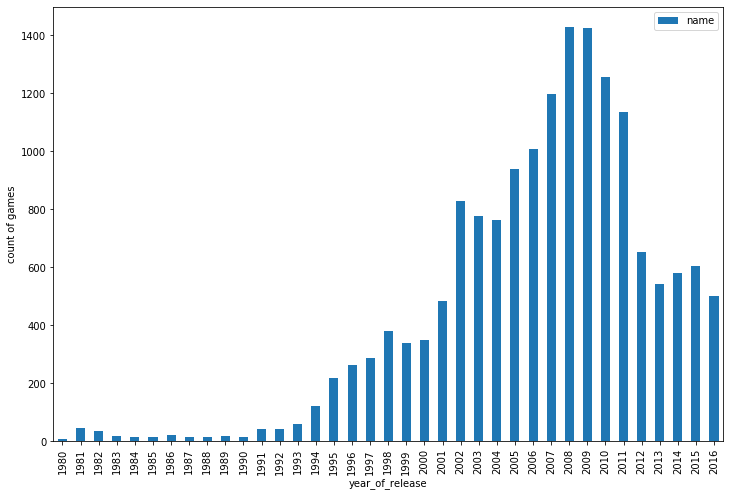

In [22]:
import matplotlib.pyplot as plt
data_pivot=df.pivot_table(index=['year_of_release'],values='name', aggfunc='count').plot.bar(figsize=(12,8))
plt.ylabel("count of games")                   
              

Text(0, 0.5, 'sales sum')

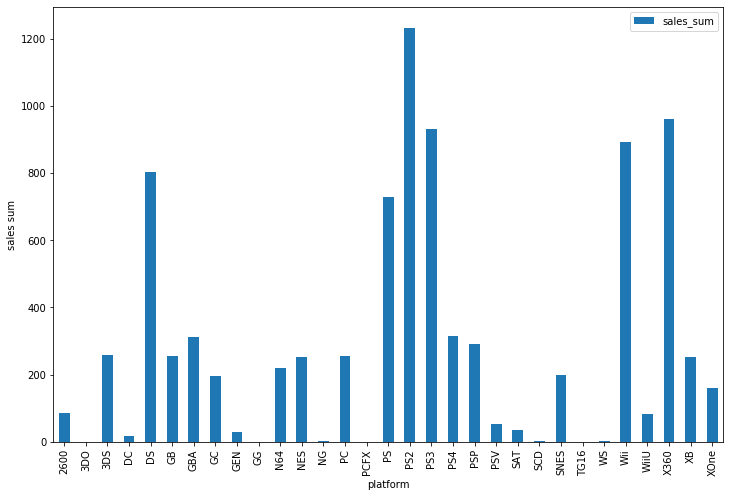

In [23]:
data_pivot_2=df.pivot_table(index=['platform'],values='sales_sum', aggfunc='sum').plot.bar(figsize=(12,8))
plt.ylabel("sales sum")                   
              

За все время лучше всего продавалась PS2, потом Xbox 360 и PS3.




Text(177.0, 0.5, 'Year')

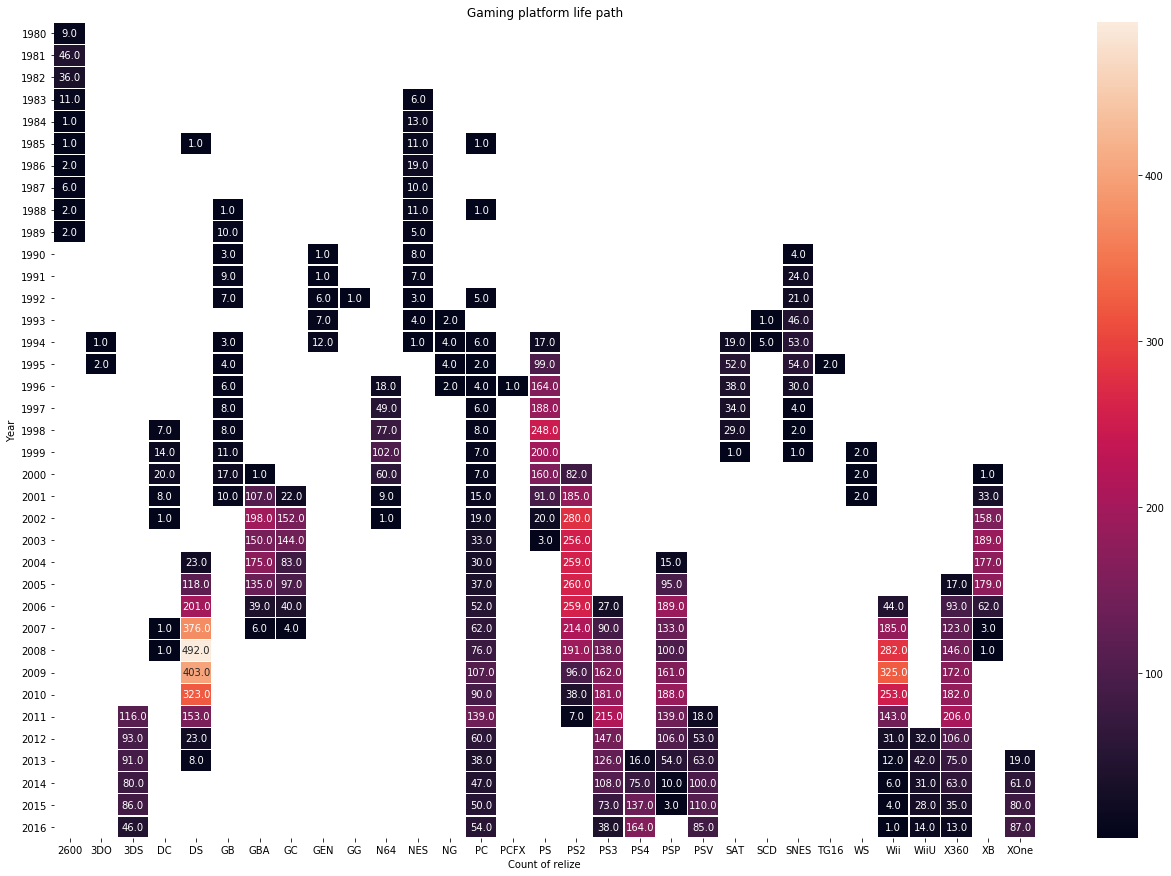

In [24]:

import seaborn as sns

platform_sales = (df.pivot_table(
                        index='year_of_release', 
                        columns='platform', 
                        values='sales_sum', 
                        aggfunc='count'))
plt.figure(figsize=(22,15))
sns.heatmap(platform_sales, annot=True, fmt=".1f", linewidths=.5)
plt.title("Gaming platform life path")
plt.xlabel("Count of relize")
plt.ylabel("Year")

Для анализа возьмем данные за последние 5 лет.
Основным лидером на рынке является Sony со своими PS4 и PSV(портативная консоль Vita). Далее можно выделить Xbox One  и PC.
Прошлый поколения консолей PS3 и XBox 360 все еще держатся на плаву с небольшой аудиторией, но  с каждым годом теряют свою актуальность, а соответственно и аудиторию. В среднем платформы живут около 10 лет, а новые серии платформ появляются раз в 5 лет.

Text(0, 0.5, 'sum of sales')

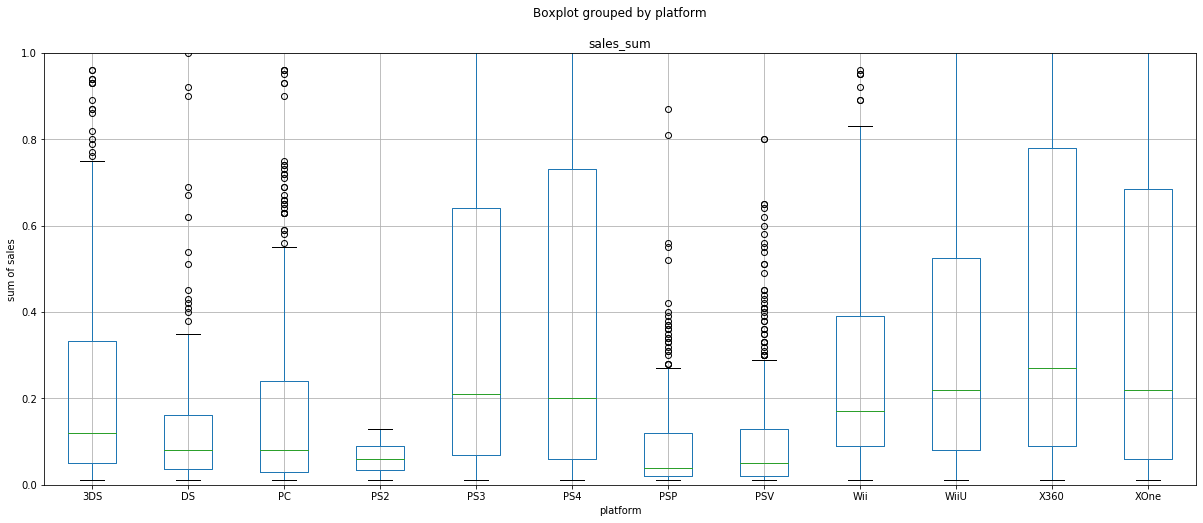

In [25]:
df_actuality=df.query('year_of_release >2010')
fig, ax = plt.subplots(figsize = (20, 8))
df_actuality.boxplot(column = 'sales_sum', by='platform', ax=ax)
plt.ylim(0, 1)
plt.ylabel("sum of sales")

In [26]:
print('Больше всего игр жанра')
print(df.pivot_table(index='genre', 
                        values ='name', 
                        aggfunc='count').sort_values(by = 'name',
                                                     ascending = False).head(1))

Больше всего игр жанра
        name
genre       
Action  3307


In [27]:
print('Игры с наибольшей оценкой от критиков')
df_ps4=df_actuality.query('platform=="PS4"')
print(df_ps4.sort_values(by = 'critic_score',
                        ascending = False).loc[:, ['name', 'critic_score','genre']].head())

Игры с наибольшей оценкой от критиков
                                     name  critic_score         genre
42                     Grand Theft Auto V          97.0        Action
171            Uncharted 4: A Thief's End          93.0       Shooter
388  Metal Gear Solid V: The Phantom Pain          93.0        Action
618                            Bloodborne          92.0        Action
302              The Witcher 3: Wild Hunt          92.0  Role-Playing


In [28]:
print('Игры с наибольшей оценкой от пользователей')
print(df_ps4.sort_values(by = 'user_score',
                        ascending = False).loc[:, ['name', 'user_score','genre']].head())

Игры с наибольшей оценкой от пользователей
                          name  user_score         genre
302   The Witcher 3: Wild Hunt         9.2  Role-Playing
1096            Dark Souls III         8.8  Role-Playing
4610      Farming Simulator 17         8.7    Simulation
5047             Rocket League         8.7        Sports
8745  The King of Fighters XIV         8.7      Fighting


Text(0, 0.5, 'sales sum')

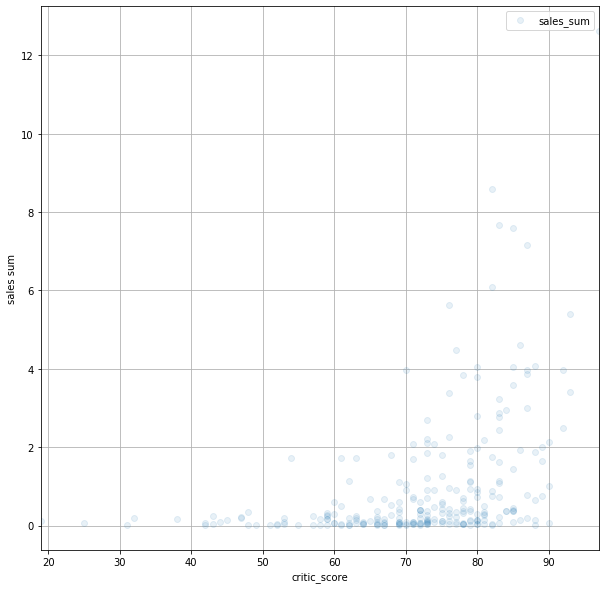

In [29]:
df_ps4.plot(x = 'critic_score', 
           y = 'sales_sum',
           style = 'o',
           grid=True, 
           figsize=(10,10), 
           alpha=0.1)
plt.ylabel("sales sum")

Text(0, 0.5, 'sales sum')

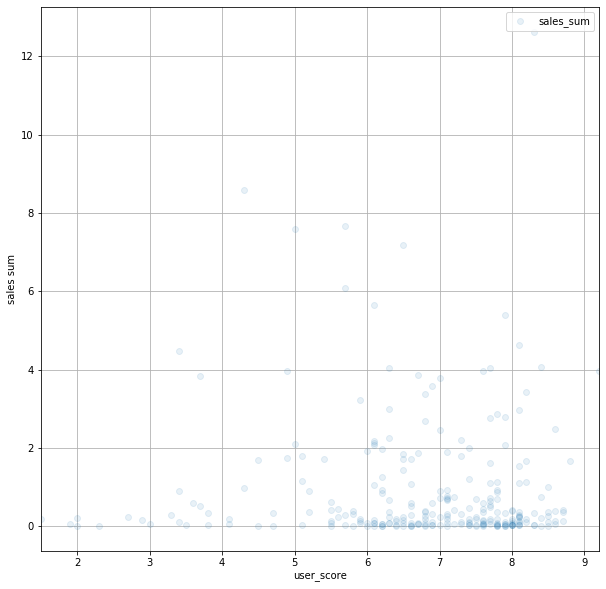

In [30]:
df_ps4.plot(x = 'user_score', 
           y = 'sales_sum',
           style = 'o',
           grid=True, 
           figsize=(10, 10), 
           alpha=0.1)
plt.ylabel("sales sum")

In [31]:
df_ps4['critic_score'].corr(df_ps4['sales_sum'])

0.40656790206178095

In [32]:
df_ps4['user_score'].corr(df_ps4['sales_sum'])

-0.031957110204556424

Оценка критиков влияет в большей степени на продажи игр, нежели оценка пользователей и чем выше оченка, тем больше вероятность, что игру купят.
    Корреляция же показывает, что оценки критиков к продажам равна 0.4, а значит  имеют влияние, а вот корреляция пользовательских оценок к продажам равна -0.03, что близко к нулю и значит, что связь слабая.
    


Игры как правило выходят сразу на нескольких платформах(например GTA или Ведьмак), отсюда следует, что оценки критиков в равной степени имеют свой вес и значимость вне зависимости от платформ. И продажи у платформ зависят от аудитории которой они владеют.
Исключением могут быть Sony со своим PS4, которые делают эксклюзивные игры только для своих пользователей, таким образом они могут переманивать себе аудиторию с других платформ, тк игра доступна только у них и рост аудитории с каждым годом тому подтверждение.

Text(0, 0.5, 'sales sum')

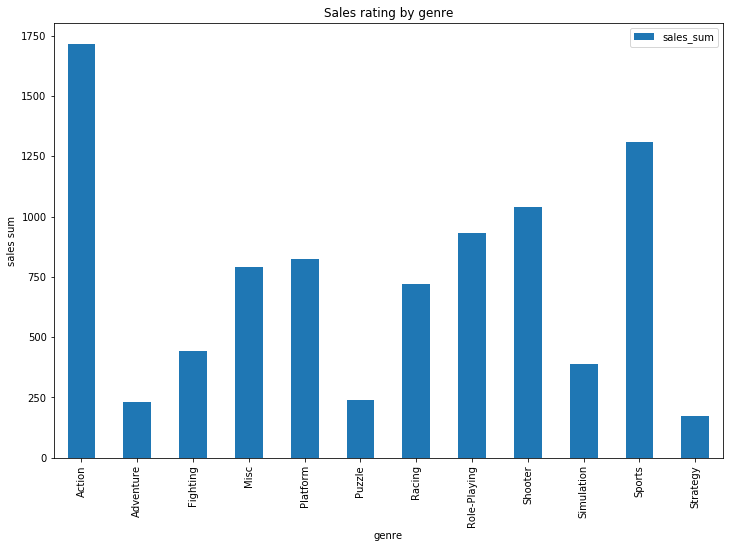

In [33]:
genre_pivot=df.pivot_table(index=['genre'],values='sales_sum', aggfunc='sum').plot.bar(figsize=(12,8))
plt.title("Sales rating by genre")
plt.ylabel("sales sum")

In [34]:
df_actuality.sort_values(by = 'sales_sum',
                        ascending = False).loc[:, ['sales_sum','name', 'critic_score','user_score','genre','platform']].head(10)

,sales_sum,name,critic_score,user_score,genre,platform
16,21.05,Grand Theft Auto V,97.0,8.2,Action,PS3
23,16.27,Grand Theft Auto V,97.0,8.1,Action,X360
29,14.73,Call of Duty: Modern Warfare 3,88.0,3.4,Shooter,X360
31,14.63,Call of Duty: Black Ops 3,NaN,NaN,Shooter,PS4
33,14.60,Pokemon X/Pokemon Y,NaN,NaN,Role-Playing,3DS
34,13.79,Call of Duty: Black Ops II,83.0,5.3,Shooter,PS3
35,13.68,Call of Duty: Black Ops II,83.0,4.8,Shooter,X360
37,13.33,Call of Duty: Modern Warfare 3,88.0,3.2,Shooter,PS3
40,12.65,Mario Kart 7,85.0,8.2,Racing,3DS
42,12.62,Grand Theft Auto V,97.0,8.3,Action,PS4


In [35]:
df_actuality.sort_values(by = 'sales_sum',
                        ascending = True).loc[:, ['sales_sum','name', 'critic_score','user_score','genre','platform']].head(10)

,sales_sum,name,critic_score,user_score,genre,platform
16440,0.01,Winning Post 8 2016,NaN,NaN,Simulation,PSV
16004,0.01,Dark Parables: The Exiled Prince,NaN,NaN,Puzzle,PC
16003,0.01,The Book of Unwritten Tales 2,NaN,NaN,Adventure,WiiU
16001,0.01,Ouka Sengoku Portable,NaN,NaN,Adventure,PSP
16000,0.01,Worms: WMD,75.0,8.1,Action,XOne
15996,0.01,htoL#NiQ: The Firefly Diary,58.0,7.7,Platform,PSV
15994,0.01,Hanayamata: Yosakoi Live,NaN,NaN,Adventure,PSV
15992,0.01,Isshoni Gohan. Portable,NaN,NaN,Adventure,PSP
15988,0.01,Entaku no Seito: Students of Round,NaN,NaN,Role-Playing,X360
15984,0.01,Azure Striker Gunvolt: Striker Pack,NaN,NaN,Action,3DS


Самым прибыльным жанром можно выделить Action,Sport и Shooter, игры данного жанра лидирует на различных платформах. В хвосте продаж идут игры жанра Adventure,Puzzle, Strategy которые распространены на портативных консолях и особую любовь у пользователей данному жанру завоевать не удалось.


## Шаг 4. Составьте портрет пользователя каждого региона

In [36]:
def top_5(data, location, genre):
    print(df_actuality.pivot_table(index = genre, 
                            values = location, 
                            aggfunc='sum').sort_values(by = location,
                                                         ascending = False).head())
    print()
for row in ['na_sales', 'eu_sales', 'jp_sales']:
    top_5(df_actuality, row, 'genre')

              na_sales
genre                 
Action          230.92
Shooter         194.43
Sports          108.70
Role-Playing     83.78
Misc             69.69

              eu_sales
genre                 
Action          199.12
Shooter         148.02
Sports           88.47
Role-Playing     62.30
Racing           40.52

              jp_sales
genre                 
Role-Playing     79.87
Action           63.62
Misc             17.60
Fighting         12.38
Platform         12.13



In [37]:
for row in ['na_sales', 'eu_sales', 'jp_sales']:
    top_5(df_actuality, row, 'platform')

          na_sales
platform          
X360        226.80
PS3         168.26
PS4         108.74
XOne         93.12
3DS          82.65

          eu_sales
platform          
PS3         163.09
PS4         141.09
X360        117.10
3DS          61.27
PC           56.64

          jp_sales
platform          
3DS         100.62
PS3          49.39
PSP          24.04
PSV          21.84
PS4          15.96



In [38]:
top_5(df_actuality,'sales_sum','rating')

        sales_sum
rating           
M          666.81
E          389.43
T          253.95
E10+       230.86
EC           0.45



In [39]:
for row in ['na_sales', 'eu_sales', 'jp_sales']:
    top_5(df_actuality, row, 'rating')

        na_sales
rating          
M         308.45
E         170.17
E10+      117.72
T         109.31
EC          0.42

        eu_sales
rating          
M         250.26
E         141.72
T          83.10
E10+       78.00
RP          0.03

        jp_sales
rating          
E          36.68
T          33.39
M          26.14
E10+       11.23
EC          0.00



Text(0.5, 1.0, 'Most popular platform in the world')

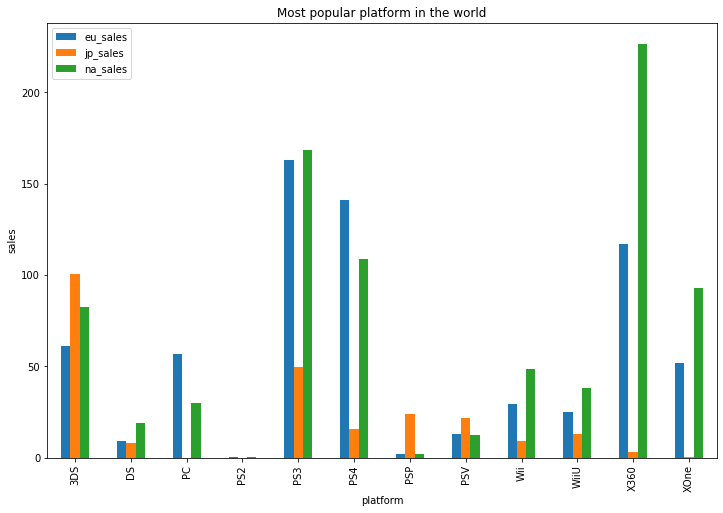

In [40]:
df_actuality.pivot_table(index='platform', values=['na_sales','eu_sales','jp_sales'], aggfunc='sum').plot.bar(figsize=(12,8))
plt.ylabel("sales")   
plt.title("Most popular platform in the world")

Text(0.5, 1.0, 'Most popular genre in the world')

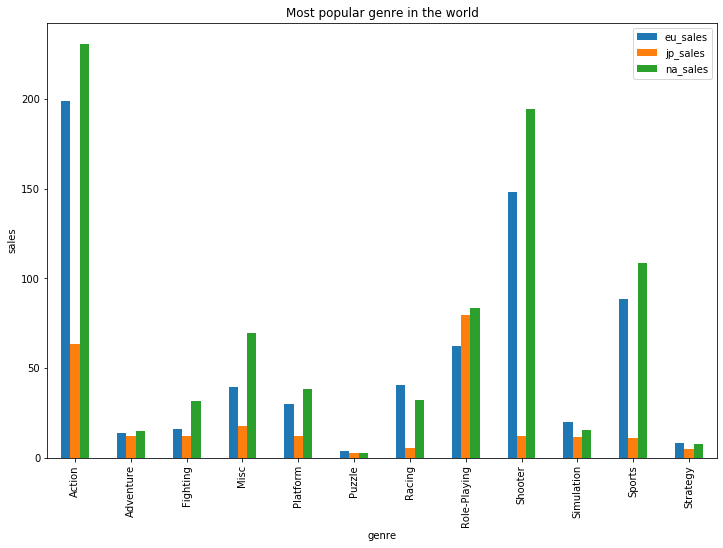

In [41]:
df_actuality.pivot_table(index='genre', values=['na_sales','eu_sales','jp_sales'], aggfunc='sum').plot.bar(figsize=(12,8))
plt.ylabel("sales") 
plt.title("Most popular genre in the world")

Text(0.5, 1.0, 'Games rating in the world')

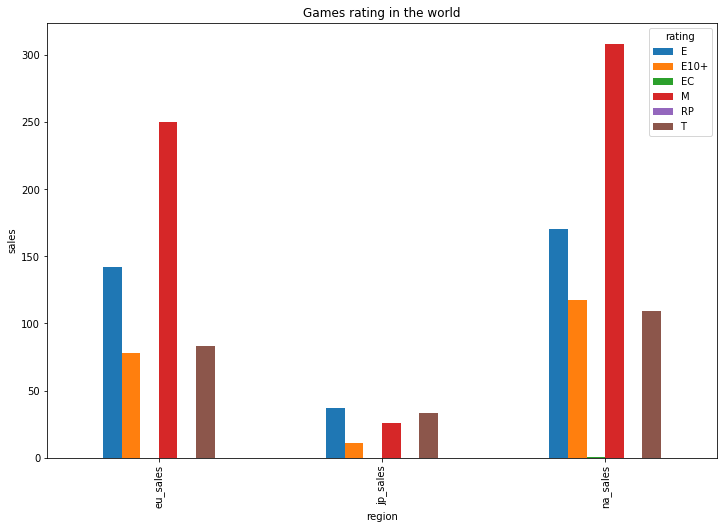

In [42]:
df_actuality.pivot_table(columns='rating', values=['na_sales','eu_sales','jp_sales'], aggfunc='sum').plot.bar(figsize=(12,8))
plt.ylabel("sales") 
plt.xlabel("region") 
plt.title("Games rating in the world")

Во всем мире примерно похожи популярные жанры, лидерами являются экшон, спотривные симуляторы  и шутеры, они занимают первые места в разных точках мира. Исключением является Япония, в которой лидером жанров является ролевые игры, а потом уже экшон и др.
Платформы же на которых пользователи больше играют в свои игры по всему миру отличаются, в Северной Америке это Xbox 360 прошлого поколения,далее идет PS3 и PS4, которые имеют больший охват нежели Xbox one. В евпропе и Японии преобладает спрос у Sony на play station, тут люди продолжают играть в PS3, но PS4 постепенно набирает обороты. Японцы же пользуются не только классическими консолями, но еще и портативными приставками Nintendo 3DS,которая является лидером в стране, а также портативками PSV и PSP. 
Рейтинг во всем мире лидирует не самый детский это М (от 17 лет), далее идет Е(для всех) и Т(для подростков).




## Шаг 5. Проверьте гипотезы

In [43]:
from scipy import stats as st

pd.set_option('mode.chained_assignment', None)
df_actuality['user_score'] = pd.to_numeric(df_actuality['user_score'], errors = 'raise')
df_actuality['user_score'] = df_actuality['user_score'].fillna(df_actuality['user_score'].mean())
#df_actuality['user_score'] = df_actuality['user_score'] * 10
df_actuality['user_score'] = df_actuality['user_score'].astype('int')     

In [44]:
XOne=df_actuality.query('platform == "XOne"')
print('Данный для Xbox one')
print('Среднее значение пользовательских оценок',XOne['user_score'].mean())
print('Медиана пользовательских оценок',XOne['user_score'].median())
print('Дисперсия пользовательских оценок', np.var(XOne['user_score']))
print('Стандартное отклонение пользовательских оценок',np.sqrt(np.var(XOne['user_score'])))



Данный для Xbox one
Среднее значение пользовательских оценок 6.080971659919029
Медиана пользовательских оценок 6.0
Дисперсия пользовательских оценок 1.369961808913439
Стандартное отклонение пользовательских оценок 1.170453676534633


In [45]:
PS4=df_actuality.query('platform == "PS4"')
print('Данные для PS4')
print('Среднее значение пользовательских оценок ',PS4['user_score'].mean())
print('Медиана пользовательских оценок',PS4['user_score'].median())
print('Дисперсия пользовательских оценок', np.var(PS4['user_score']))
print('Стандартное отклонение пользовательских оценок',np.sqrt(np.var(PS4['user_score'])))

Данные для PS4
Среднее значение пользовательских оценок  6.196428571428571
Медиана пользовательских оценок 6.0
Дисперсия пользовательских оценок 1.4588647959183674
Стандартное отклонение пользовательских оценок 1.207834755220418


In [46]:
Action=df_actuality.query('genre == "Action"')
print('Данные для жанра Action')
print('Среднее значение пользовательских оценок',Action['user_score'].mean())
print('Медиана пользовательских оценок',Action['user_score'].median())
print('Дисперсия пользовательских оценок', np.var(Action['user_score']))
print('Стандартное отклонение пользовательских оценок',np.sqrt(np.var(Action['user_score'])))

Данные для жанра Action
Среднее значение пользовательских оценок 6.1717888100866825
Медиана пользовательских оценок 6.0
Дисперсия пользовательских оценок 0.9996454211198605
Стандартное отклонение пользовательских оценок 0.9998226948413707


In [47]:
Sports=df_actuality.query('genre == "Sports"')
print('Данные для жанра Sports')
print('Среднее значение пользовательских оценок',Sports['user_score'].mean())
print('Медиана пользовательских оценок',Sports['user_score'].median())
print('Дисперсия пользовательских оценок', np.var(Sports['user_score']))
print('Стандартное отклонение пользовательских оценок',np.sqrt(np.var(Sports['user_score'])))

Данные для жанра Sports
Среднее значение пользовательских оценок 5.505154639175258
Медиана пользовательских оценок 6.0
Дисперсия пользовательских оценок 1.9870868317568289
Стандартное отклонение пользовательских оценок 1.4096406746957995


In [48]:
alpha = 0.05


results = st.ttest_ind(
        XOne['user_score'], 
        PS4['user_score'],
        equal_var=True,
        )
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.23491800912562244
Не получилось отвергнуть нулевую гипотезу


Рейтинг двух платформ одинаков, нулевая гипотеза подтвердилась.

In [49]:
results = st.ttest_ind(
        Action['user_score'], 
        Sports['user_score'],
        equal_var=False,
        )
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 6.104704333207777e-17
Отвергаем нулевую гипотезу


Рейтинг жанров различен, нулевая гипотеза отвергается.

Нулевая и альтернативная гипотезы формируются на основании средних значений пользовательских рейтингов. 

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые, гипотеза подтвердилась. Среднее значение, медиана, дисперсия, стандартное отклонение для двух выборок примерно одинаковы, отсюда делаем вывод, что сравниваемые выборки равны и наша гипотеза подтвердилась. 

Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные, гипотеза подтвердилась. Дисперсия отличается почти в два раза и стандартное отклоение в полтора раза, что говорит о  разности сравниваемых выборок. Высокое стандартное отклонение и дисперсия указывает на то, что значения разбросаны в более широком диапазоне и имеют отклонение от нормального распределения.

Для проверки гипотез был выбран 2-х выборочный критерий, тк имелось две выборки для сравнения и при помощи функции ttest_ind,которой передаются необходимые выборки, которые смогли подтвердить наши гипотезы. 


## Шаг 6. Напишите общий вывод

На основе данных за 5 лет, которые были взяты для анализа можно сделать следующие выводы для закупки следующего года:

- Сделать акцент для платформ PS4, XBox One и Nintendo 3DS.
- Из жанров стоит выделить Action,Sports, Shooter и Role Plaing для потративных консолей.
- Опираться на оценки критиков, которые помогут выбрать топовые релизы, ожидаемые геймерами.
